In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, integrate


 # Plot settings
 

In [2]:
plt.style.available
plt.style.use(['classic'])
%matplotlib inline

# History from 12Mar2017 to 16Mar2017

In [3]:
week1 = pd.read_csv('12.03.2017_16.03.2017.txt', sep=';', decimal=',',error_bad_lines=False)
week1['Date'] = week1['Date'].str[:10]
week1['Date'] =  pd.to_datetime(week1['Date'], format='%d.%m.%Y')
week1

,Date,Tiker,Price_Close,Position,Market_Value,PL_Cum,Comment
0,2017-03-12,QQQ,131.58900,25,3289.72,0.00,NaN
1,2017-03-12,TLT,116.71330,30,3501.40,0.00,NaN
2,2017-03-12,TQQQ,86.36632,38,3281.92,0.00,NaN
3,2017-03-13,QQQ,131.61000,25,3290.25,0.52,NaN
4,2017-03-13,TLT,116.51000,30,3495.30,-6.10,NaN
5,2017-03-13,TQQQ,86.39000,38,3282.82,0.90,NaN
6,2017-03-14,QQQ,131.29000,25,3282.25,-7.48,NaN
7,2017-03-14,TLT,117.07000,30,3512.10,10.70,NaN
8,2017-03-14,TQQQ,85.75000,38,3258.50,-23.42,NaN
9,2017-03-15,QQQ,132.10000,25,3302.50,12.78,Fed Raises Interest Rates


# PL detalization

In [29]:
#Calculate daily Total PL_Com
week1_pl = week1
week1_pl=week1_pl.drop(['Market_Value', 'Comment','Tiker', 'Price_Close','Position'], axis=1)
week1_pl = week1_pl.groupby('Date', as_index=False).sum()


In [27]:
#Calculate daily PL (QQQ)
week1_pl_qqq = week1[week1['Tiker'] == 'QQQ']
week1_pl_qqq =week1_pl_qqq.drop(['Market_Value', 'Comment','Tiker', 'Price_Close','Position'], axis=1)
week1_pl_qqq=week1_pl_qqq.rename(columns = {'PL_Cum':'PL_QQQ'})

#Calculate daily PL (TLT)
week1_pl_tlt = week1[week1['Tiker'] == 'TLT']
week1_pl_tlt =week1_pl_tlt.drop(['Market_Value', 'Comment','Tiker', 'Price_Close','Position'], axis=1)
week1_pl_tlt=week1_pl_tlt.rename(columns = {'PL_Cum':'PL_TLT'})

#Calculate daily PL (TQQQ)
week1_pl_tqqq = week1[week1['Tiker'] == 'TQQQ']
week1_pl_tqqq =week1_pl_tqqq.drop(['Market_Value', 'Comment','Tiker', 'Price_Close','Position'], axis=1)
week1_pl_tqqq=week1_pl_tqqq.rename(columns = {'PL_Cum':'PL_TQQQ'})


In [31]:
pl = pd.merge(week1_pl_qqq,week1_pl_tlt, on = 'Date')
pl = pd.merge(pl,week1_pl_tqqq, on = 'Date')
pl = pd.merge(pl,week1_pl, on = 'Date')
pl

,Date,PL_QQQ,PL_TLT,PL_TQQQ,PL_Cum
0,2017-03-12,0.00,0.0,0.00,0.00
1,2017-03-13,0.52,-6.1,0.90,-4.68
2,2017-03-14,-7.48,10.7,-23.42,-20.20
3,2017-03-15,12.78,53.6,33.58,99.96
4,2017-03-16,10.52,35.6,31.68,77.80


# PL from 12Mar2017 to 16Mar2017

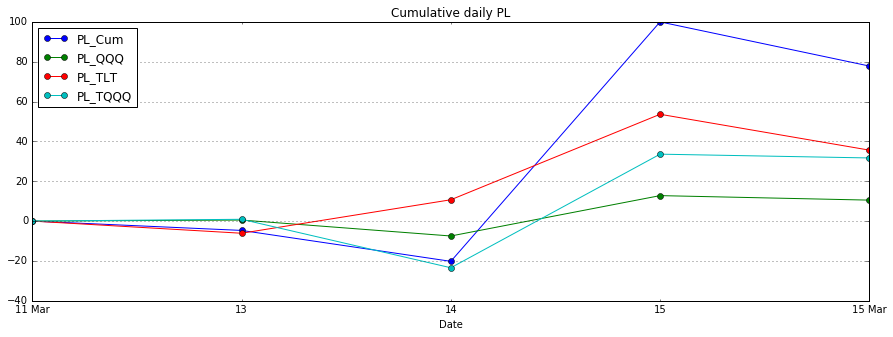

In [117]:
plt.rcParams["figure.figsize"] = (15,5)
pl.plot(x='Date', y=['PL_Cum', 'PL_QQQ', 'PL_TLT', 'PL_TQQQ'], marker="o")
plt.grid(True)
plt.title('Cumulative daily PL')
formatter = DateFormatter('%d %b')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)  


plt.show()

# Market Value from 12Mar2017 to 16Mar2017

In [137]:
week1_mv = week1
week1_mv=week1_mv.drop(['PL_Cum', 'Comment','Tiker', 'Price_Close','Position'], axis=1)
week1_mv = week1_mv.groupby('Date', as_index=False).sum()
week1_mv['Initial']=9500

week1_mv

,Date,Market_Value,Initial
0,2017-03-12,10073.04,9500
1,2017-03-13,10068.37,9500
2,2017-03-14,10052.85,9500
3,2017-03-15,10173.00,9500
4,2017-03-16,10150.85,9500


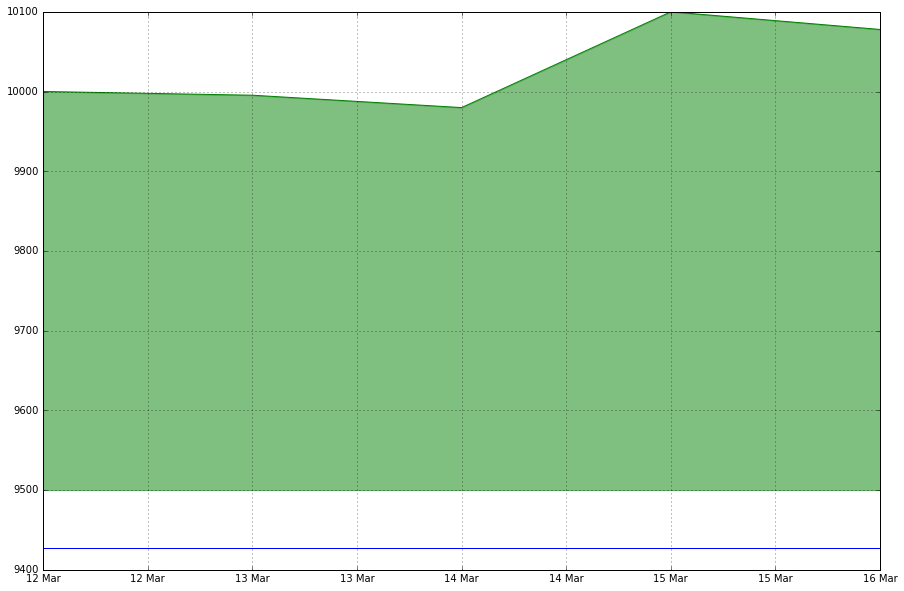

In [138]:
from matplotlib.dates import DateFormatter
date_x =week1_mv.Date.values
date_x1 = np.arange(np.datetime64('2017-03-12'), np.datetime64('2017-03-17'))
ax = plt.rcParams["figure.figsize"] = (15,10)
ax = plt.plot(week1_mv.Date.values,week1_mv.Initial.values-73,week1_mv.Date.values, week1_mv.Market_Value.values-73)


plt.fill_between(week1_mv.Date.values, week1_mv.Market_Value.values-73, week1_mv.Initial.values,alpha=0.5, color='green')
plt.grid(True)

formatter = DateFormatter('%d %b')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)  

